In [ ]:
# These modules and libraries must be imported to properly run the notebook
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import torch
import sklearn

from operator import itemgetter

In [ ]:
cd /content/drive/MyDrive/Projet_Follicles

/content/drive/MyDrive/Projet_Follicles


In [ ]:
FOLDER = os.path.abspath("")
NEW_DATA_FOLDER = os.path.join(FOLDER,'datasets','follicles')

## Prepare the data

In [ ]:
# Display labels.csv as a pandas dataframe for train set
train_labels = pd.read_csv(os.path.join("data", "train", "labels.csv"))
train_labels=train_labels.loc[train_labels.label!=0] #discard the Null class
train_labels.head(10)

,Unnamed: 0,filename,width,height,class,label,xmin,ymin,xmax,ymax
0,0,D-1M01-2.jpg,2194,2112,Primary,2,1512,1187,1812,1373
1,1,D-1M01-2.jpg,2194,2112,Primordial,1,202,1095,270,1160
2,2,D-1M01-2.jpg,2194,2112,Secondary,3,362,1058,737,1404
3,3,D-1M01-2.jpg,2194,2112,Secondary,3,535,275,888,609
4,4,D-1M01-2.jpg,2194,2112,Secondary,3,977,307,1491,843
13,13,D-1M01-3.jpg,2935,2852,Primary,2,1671,569,1825,709
14,14,D-1M01-3.jpg,2935,2852,Primary,2,2040,2424,2141,2517
15,15,D-1M01-3.jpg,2935,2852,Primordial,1,246,1185,319,1281
16,16,D-1M01-3.jpg,2935,2852,Primordial,1,1068,2548,1171,2626
17,17,D-1M01-3.jpg,2935,2852,Primordial,1,1107,226,1253,307


In [ ]:
# Transform box coords to the yolo format

train_labels['xcenter']=(train_labels['xmin']+train_labels['xmax'])/2
train_labels.xcenter = train_labels['xcenter'].astype(int)

train_labels['ycenter']=(train_labels['ymin']+train_labels['ymax'])/2
train_labels.ycenter = train_labels['ycenter'].astype(int)

train_labels['xwidth']=train_labels['xmax']-train_labels['xmin']
train_labels['yheight']=train_labels['ymax']-train_labels['ymin']

train_labels['xcenter']/=train_labels['width']
train_labels['xwidth']/=train_labels['width']
train_labels['ycenter']/=train_labels['height']
train_labels['yheight']/=train_labels['height']


In [ ]:
train_names=np.unique(train_labels.filename)

for name in train_names:
  with open(os.path.join(NEW_DATA_FOLDER,'labels','train',name[:-4]+'.txt'),'w') as f:
    df=train_labels.loc[train_labels.filename==name].reset_index()
    for i in range(len(df)):
      text_line=str(df.label[i]-1)+' '+str(df.xcenter[i])+' '+str(df.ycenter[i])+' '+str(df.xwidth[i])+' '+str(df.yheight[i])
      print(text_line,file=f)

In [ ]:
# Display labels.csv as a pandas dataframe for train set
val_labels = pd.read_csv(os.path.join("data", "test", "labels.csv"))
val_labels=val_labels.loc[val_labels.label!=0] #we discard the Null class

# Transform box coords to the yolo format
val_labels['xcenter']=(val_labels['xmin']+val_labels['xmax'])/2
val_labels.xcenter = val_labels['xcenter'].astype(int)

val_labels['ycenter']=(val_labels['ymin']+val_labels['ymax'])/2
val_labels.ycenter = val_labels['ycenter'].astype(int)

val_labels['xwidth']=val_labels['xmax']-val_labels['xmin']
val_labels['yheight']=val_labels['ymax']-val_labels['ymin']

val_labels['xcenter']/=val_labels['width']
val_labels['xwidth']/=val_labels['width']
val_labels['ycenter']/=val_labels['height']
val_labels['yheight']/=val_labels['height']

In [ ]:
val_img_names=np.unique(val_labels.filename)

for name in val_img_names:
  with open(os.path.join(NEW_DATA_FOLDER,'labels','valid',name[:-4]+'.txt'),'w') as f:
    df=val_labels.loc[val_labels.filename==name].reset_index()
    for i in range(len(df)):
      text_line=str(df.label[i]-1)+' '+str(df.xcenter[i])+' '+str(df.ycenter[i])+' '+str(df.xwidth[i])+' '+str(df.yheight[i])
      print(text_line,file=f)

## Clone yolo and install dependencies

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 11290, done.
remote: Total 11290 (delta 0), reused 0 (delta 0), pack-reused 11290
Receiving objects: 100% (11290/11290), 11.20 MiB | 7.24 MiB/s, done.
Resolving deltas: 100% (7808/7808), done.


In [ ]:
cd yolov5

/content/drive/MyDrive/Projet_Follicles/yolov5


In [ ]:
!pip install -r requirements.txt  # install

     |████████████████████████████████| 596 kB 8.0 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
cd ..

/content/drive/MyDrive/Projet_Follicles


In [ ]:
#!pip install wandb

In [ ]:
#!pip install -U albumentations

In [ ]:
!pip uninstall opencv-python-headless
!pip install opencv-python-headless==4.1.2.30

     |████████████████████████████████| 21.8 MB 12.3 MB/s 


## Finetuning pretrained yolo on the follicles dataset


In [ ]:
cd yolov5


/content/drive/MyDrive/Projet Follicles/yolov5


In [ ]:
!python train.py --img 1280 --batch 16 --epochs 100 --data follicles.yaml --weights yolov5s.pt

wandb: Currently logged in as: yanniboo (use `wandb login --relogin` to force relogin)
train: weights=yolov5s.pt, cfg=, data=follicles.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=1280, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-32-gc13d4ce torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t

### Test the model

In [ ]:
test_dir=os.path.join(NEW_DATA_FOLDER,'images','valid')

In [ ]:
!python detect.py --weights runs/train/exp4/weights/best.pt --img 2016 --conf 0.05 --save-txt --source /content/drive/MyDrive/Projet_Follicles/datasets/follicles/images/valid

detect: weights=['runs/train/exp4/weights/best.pt'], source=/content/drive/MyDrive/Projet_Follicles/datasets/follicles/images/valid, data=data/coco128.yaml, imgsz=[2016, 2016], conf_thres=0.05, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-32-gc13d4ce torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7020913 parameters, 0 gradients
image 1/5 /content/drive/MyDrive/Projet_Follicles/datasets/follicles/images/valid/D-1M06-1.jpg: 1376x2016 8 Primordials, 5 Primarys, 5 Secondarys, 5 Tertiarys, Done. (0.119s)
image 2/5 /content/drive/MyDrive/Projet_Follicles/datasets/follicles/images/valid/D-1M06-2.jpg: 1312x2016 10 Primordials, 7 Primarys, 4 Secondarys, 2 Tertiary

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('runs/detect/exp9/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

## Training custom yolo on follicles dataset from scratch

In [ ]:
!python train.py --img 1280 --batch 16 --epochs 100 --data follicles.yaml --weights '' --cfg yolov5s.yaml

wandb: Currently logged in as: yanniboo (use `wandb login --relogin` to force relogin)
train: weights=, cfg=yolov5s.yaml, data=follicles.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=1280, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-32-gc13d4ce torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor

In [ ]:
!python detect.py --weights runs/train/exp8/weights/best.pt --img 2016 --conf 0.05 --save-txt --source /content/drive/MyDrive/Projet_Follicles/datasets/follicles/images/valid

detect: weights=['runs/train/exp8/weights/best.pt'], source=/content/drive/MyDrive/Projet_Follicles/datasets/follicles/images/valid, data=data/coco128.yaml, imgsz=[2016, 2016], conf_thres=0.05, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-32-gc13d4ce torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/5 /content/drive/MyDrive/Projet_Follicles/datasets/follicles/images/valid/D-1M06-1.jpg: 1376x2016 Done. (0.144s)
image 2/5 /content/drive/MyDrive/Projet_Follicles/datasets/follicles/images/valid/D-1M06-2.jpg: 1312x2016 Done. (0.139s)
image 3/5 /content/drive/MyDrive/Projet_Follicles/datasets/follicles/images/va

## Test load and predict

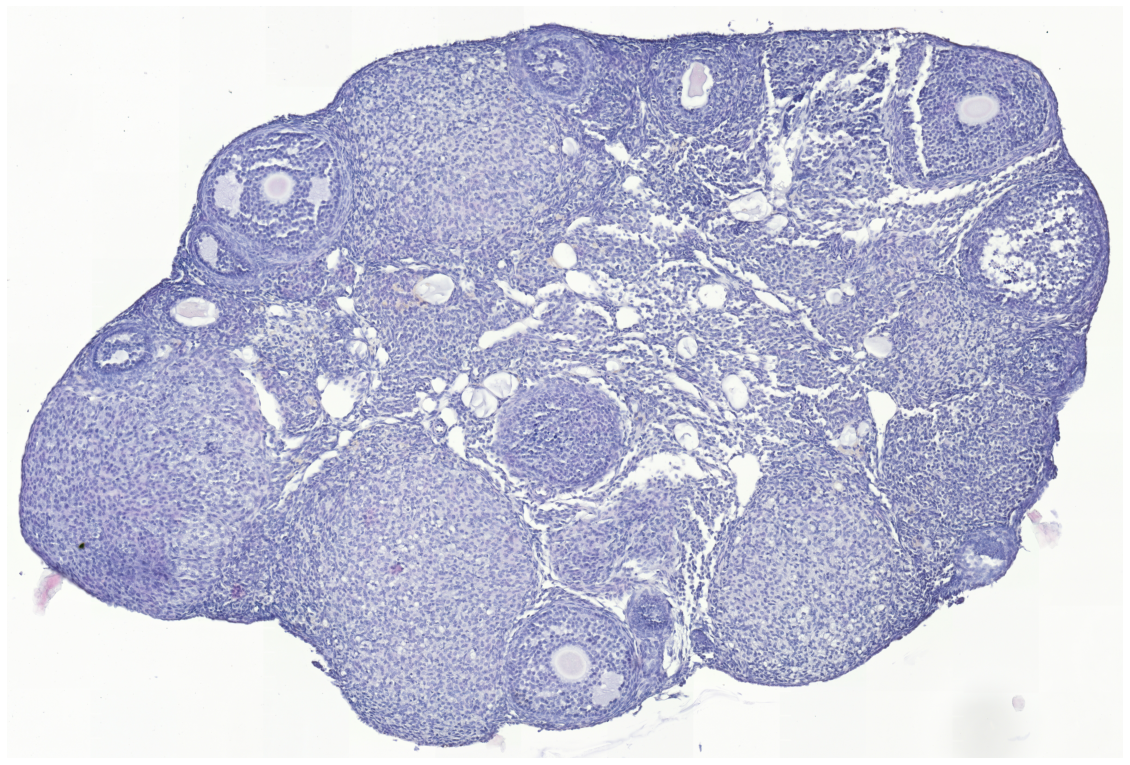

In [ ]:
val_dir='/content/drive/MyDrive/Projet_Follicles/datasets/follicles/images/valid/'

img1=Image.open(val_dir+'D-1M06-1.jpg')
    
plt.figure(figsize=(20, 20))
plt.axis("off")
plt.imshow(img1)

In [ ]:
path_best='/content/drive/MyDrive/Projet_Follicles/yolov5/runs/train/yolo_small_img1280_ep100/weights/best.pt'


#model = torch.hub.load('bouacheya/yolov5:master', 'custom',path_best)

model = torch.hub.load('bouacheya/yolov5', 'yolo_on_follicles')

results=model(img1,size=1280)

results.pandas().xyxy[0]

Downloading: "https://github.com/bouacheya/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip


yannis folliclesss


requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...

requirements: 1 package updated per /root/.cache/torch/hub/bouacheya_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-3-26 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)


                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]              
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  2    115712  models.common.C3                        [128, 128, 2]                 
  5     

yannis /root/.cache/torch/hub/bouacheya_yolov5_master/models/yolo_on_follicles.yaml


 24      [17, 20, 23]  1     24273  models.yolo.Detect                      [4, [[10, 13, 16, 30, 33, 23], [30, 61, 62, 45, 59, 119], [116, 90, 156, 198, 373, 326]], [128, 256, 512]]
Model Summary: 270 layers, 7030417 parameters, 7030417 gradients, 15.9 GFLOPs



yannis attempt dl
yannis file yolo_on_follicles.pt True


Adding AutoShape... 


,xmin,ymin,xmax,ymax,confidence,class,name
0,6620.835938,329.437317,7593.499512,1289.525146,0.773833,3,Tertiary
1,3730.708008,4407.308594,4591.220703,5258.977051,0.750354,3,Tertiary
2,1432.446899,898.451904,2485.601318,1792.626099,0.661304,3,Tertiary
3,4786.500977,277.683197,5348.901367,879.906799,0.543574,3,Tertiary
4,4753.555664,286.392517,5384.788574,926.550537,0.543569,2,Secondary
5,1116.570679,2042.990601,1641.422852,2419.869629,0.432711,2,Secondary
6,1332.897583,1600.494873,1803.467651,1993.036499,0.388573,2,Secondary


In [ ]:
#model = torch.hub.load('bouacheya/yolov5', 'yolov5s6',classes=4)

model = torch.hub.load('bouacheya/yolov5', 'yolo_on_follicles')

Using cache found in /root/.cache/torch/hub/bouacheya_yolov5_master
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...


yannis folliclesss



requirements: 1 package updated per /root/.cache/torch/hub/bouacheya_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-3-26 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)


                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]              
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  2    115712  models.common.C3                        [128, 128, 2]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]       

yannis /root/.cache/torch/hub/bouacheya_yolov5_master/models/yolo_on_follicles.yaml


Model Summary: 270 layers, 7030417 parameters, 7030417 gradients, 15.9 GFLOPs

Adding AutoShape... 


yannis attempt dl
yannis file yolo_on_follicles.pt True


In [ ]:
model.conf=0.1

In [ ]:
results=model(img1,size=1280)

results = results.pandas().xyxy[0]
results

,xmin,ymin,xmax,ymax,confidence,class,name
0,6620.835938,329.437317,7593.499512,1289.525146,0.773833,3,Tertiary
1,3730.708008,4407.308594,4591.220703,5258.977051,0.750354,3,Tertiary
2,1432.446899,898.451904,2485.601318,1792.626099,0.661304,3,Tertiary
3,4786.500977,277.683197,5348.901367,879.906799,0.543574,3,Tertiary
4,4753.555664,286.392517,5384.788574,926.550537,0.543569,2,Secondary
5,1116.570679,2042.990601,1641.422852,2419.869629,0.432711,2,Secondary
6,1332.897583,1600.494873,1803.467651,1993.036499,0.388573,2,Secondary
7,7520.366211,3705.145752,7592.924316,3811.172363,0.198616,1,Primary
8,7512.177246,3681.550049,7655.451172,3835.492432,0.146394,0,Primordial
9,3757.326172,4417.982910,4463.163574,5225.254883,0.140518,2,Secondary


In [ ]:
results = results.loc[(results.confidence>0.25) | (results['class'].isin([0,1]))]
results = results.reset_index().drop(columns=['index'])
results

,xmin,ymin,xmax,ymax,confidence,class,name
0,6620.835938,329.437317,7593.499512,1289.525146,0.773833,3,Tertiary
1,3730.708008,4407.308594,4591.220703,5258.977051,0.750354,3,Tertiary
2,1432.446899,898.451904,2485.601318,1792.626099,0.661304,3,Tertiary
3,4786.500977,277.683197,5348.901367,879.906799,0.543574,3,Tertiary
4,4753.555664,286.392517,5384.788574,926.550537,0.543569,2,Secondary
5,1116.570679,2042.990601,1641.422852,2419.869629,0.432711,2,Secondary
6,1332.897583,1600.494873,1803.467651,1993.036499,0.388573,2,Secondary
7,7520.366211,3705.145752,7592.924316,3811.172363,0.198616,1,Primary
8,7512.177246,3681.550049,7655.451172,3835.492432,0.146394,0,Primordial
9,7508.075684,3714.269287,7633.959473,3774.293701,0.136276,1,Primary
